In [18]:
import pandas as pa
import seaborn as sns
import numpy as np

dti = pa.read_csv("Important_data.csv")
df = pa.read_csv("trans-characters-in-youth-cartoons.csv")

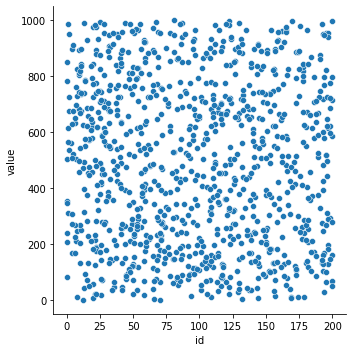

In [19]:
sns.relplot(x="id",y="value", data = dti)

<AxesSubplot:xlabel='count', ylabel='show'>

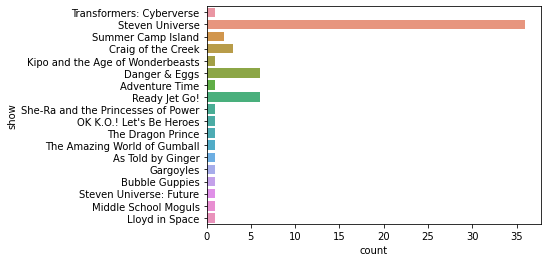

In [104]:
nbData = df.loc[("Woman" != df["gender"]) &( "Man" != df["gender"])&( "Cis, Man" != df["gender"]) & ( "Cis, Woman" != df["gender"]) & ( "Trans, Woman" != df["gender"])& ( "Trans, Man" != df["gender"]) ]
sns.countplot(data=nbData, y="show")



In [ ]:
sns.countplot(data = df, )

<AxesSubplot:xlabel='count', ylabel='show'>

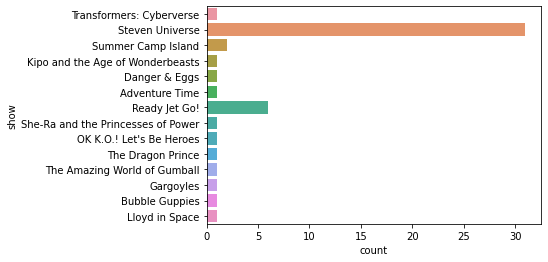

In [124]:
UnknownNbData = nbData.loc[(nbData["race"] != "White") & (nbData["race"] != "POC") & (nbData["race"] != "Unknown") ]

sns.countplot(data=UnknownNbData, y="show")



In [134]:
dataCount = data.groupby(["show"]).count()

##sns.barplot(data=dataCount.loc[dataCount["character" ]> 1],x="show", y="character", palette="dark")
##dataCount.loc[dataCount["character" ]> 1].plot(kind = "bar",x="character", y="show") 
##sns.barplot(x=data.show.value_counts().index, y=df.character.value_counts())
data.show.value_counts()
##dataCount.sort_values("character")

Steven Universe                       36
Danger & Eggs                          6
Ready Jet Go!                          6
Craig of the Creek                     3
Summer Camp Island                     2
Transformers: Cyberverse               1
As Told by Ginger                      1
Middle School Moguls                   1
Steven Universe: Future                1
Bubble Guppies                         1
Gargoyles                              1
OK K.O.! Let's Be Heroes               1
The Amazing World of Gumball           1
The Dragon Prince                      1
She-Ra and the Princesses of Power     1
Adventure Time                         1
Kipo and the Age of Wonderbeasts       1
Lloyd in Space                         1
Name: show, dtype: int64